In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
nhspi = pd.read_csv('../data/nhspi_2021_domains.csv')

# Converting dataset to year-wise chunks 

In [3]:
nhspi_year = []

for year in range (2013,2021):
    nhspi_year.append(nhspi[nhspi['YEAR']==year])

In [4]:
for frame,year in zip(nhspi_year,range (2013,2021)):
    frame.rename({'HSS': f'HSS_{year}',
              'CPE': f'CPE_{year}',
              'IIM': f'IIM_{year}',
              'HD': f'HD_{year}',
              'CM': f'CM_{year}',
              'EOH': f'EOH_{year}'}, axis=1, inplace=True)
    frame.drop(['YEAR'],axis=1,inplace=True)

/tmp/ipykernel_1179/1665288106.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame.rename({'HSS': f'HSS_{year}',
/tmp/ipykernel_1179/1665288106.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame.drop(['YEAR'],axis=1,inplace=True)
/tmp/ipykernel_1179/1665288106.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame.rename({'HSS': f'HSS_{year}',
/tmp/ipykernel_1179/1665288106.py:8: SettingWithCopyWarning: 
A value is tryi

In [5]:
main_data = nhspi_year[0]

for target in nhspi_year[1:]:
    
    main_data = pd.merge(main_data, target, on='STATE')

In [6]:
main_data.to_csv('../data/nhspi_2021_domains_processed.csv')

# Checking Correlation with state vaccination data

In [7]:
state_vac = pd.read_csv('../data/state_vac.csv')

In [8]:
us_states = pd.read_csv('../data/us_states.csv')

In [9]:
# Adding state shorthands to the data 
state_vac = pd.merge(state_vac,us_states,left_on='S1_state',right_on='stateName')

In [10]:
state_vac.columns

Index(['Unnamed: 0', 'S4_people_vaccinated_per_hundred',
       'S4_people_fully_vaccinated_per_hundred', 'S4_people_vaccinated',
       'S4_people_fully_vaccinated', 'S3_people_vaccinated_per_hundred',
       'S3_people_fully_vaccinated_per_hundred', 'S3_people_vaccinated',
       'S3_people_fully_vaccinated', 'S2_people_vaccinated_per_hundred',
       'S2_people_fully_vaccinated_per_hundred', 'S2_people_vaccinated',
       'S2_people_fully_vaccinated', 'S1_people_vaccinated_per_hundred',
       'S1_people_fully_vaccinated_per_hundred', 'S1_people_vaccinated',
       'S1_people_fully_vaccinated', 'S1_state', 'stateName', 'stateCode'],
      dtype='object')

In [11]:
state_vac.drop(['S4_people_fully_vaccinated','S3_people_fully_vaccinated','S2_people_fully_vaccinated','S1_people_fully_vaccinated','S4_people_vaccinated','S3_people_vaccinated','S2_people_vaccinated','S1_people_vaccinated'],axis=1,inplace=True)

In [12]:
state_vac.drop(['stateName','S1_state'],axis=1,inplace=True)

In [13]:
TEST_ONE = pd.merge(state_vac,main_data,left_on='stateCode',right_on='STATE')

In [14]:
TEST_ONE.drop(['STATE','Unnamed: 0'],axis=1,inplace=True)

In [15]:
TEST_ONE_STATE = TEST_ONE[['stateCode']]
TEST_ONE.drop(['stateCode'],axis=1,inplace=True)

In [16]:
TEST_ONE = TEST_ONE.apply(stats.zscore)
corrMatrix = TEST_ONE.corr()

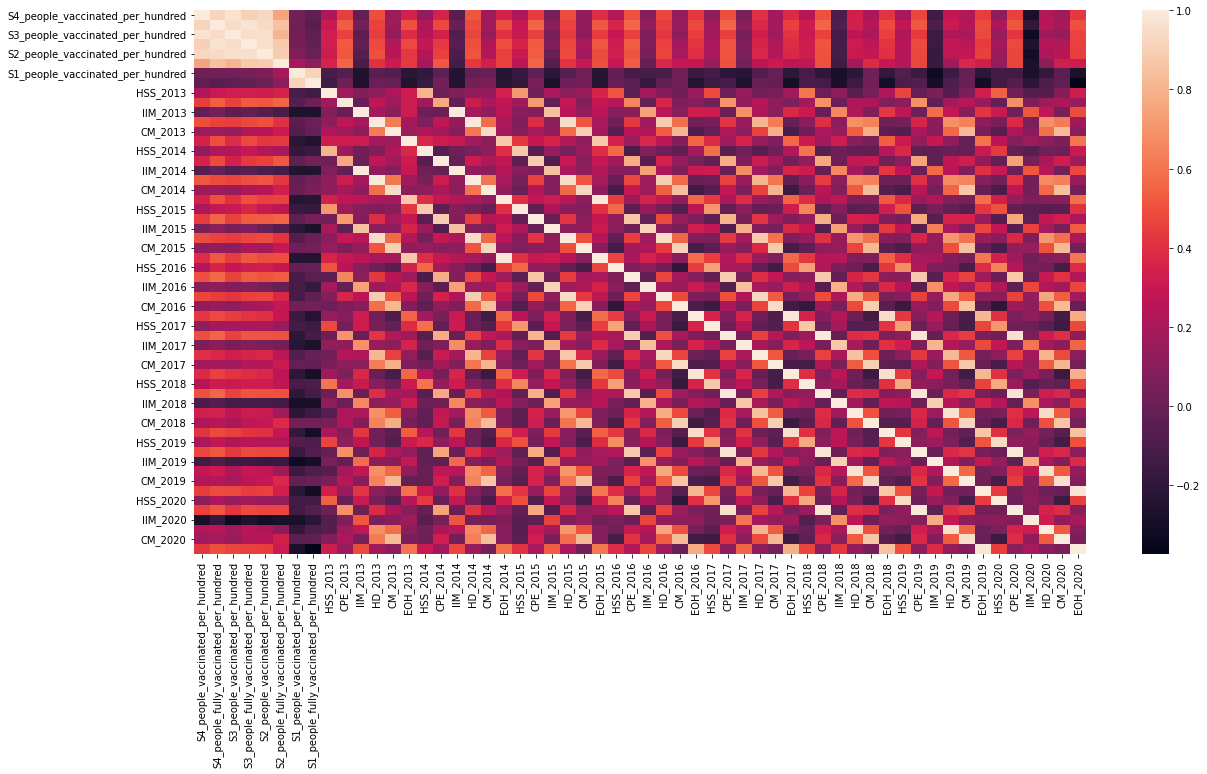

In [20]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

heatmap = sn.heatmap(corrMatrix, annot=False)


In [21]:
figure = heatmap.get_figure()    
figure.savefig('svm_conf.png', dpi=800)

In [22]:
corrMatrix

,S4_people_vaccinated_per_hundred,S4_people_fully_vaccinated_per_hundred,S3_people_vaccinated_per_hundred,S3_people_fully_vaccinated_per_hundred,S2_people_vaccinated_per_hundred,S2_people_fully_vaccinated_per_hundred,S1_people_vaccinated_per_hundred,S1_people_fully_vaccinated_per_hundred,HSS_2013,CPE_2013,...,IIM_2019,HD_2019,CM_2019,EOH_2019,HSS_2020,CPE_2020,IIM_2020,HD_2020,CM_2020,EOH_2020
S4_people_vaccinated_per_hundred,1.000000,0.916719,0.962986,0.900436,0.929814,0.752289,0.025270,-0.032369,0.222957,0.442195,...,-0.137296,0.285992,0.230975,0.442469,0.114988,0.452537,-0.277106,0.228623,0.177260,0.431147
S4_people_fully_vaccinated_per_hundred,0.916719,1.000000,0.943162,0.971669,0.938303,0.852500,0.022353,-0.053248,0.305489,0.535920,...,-0.090431,0.309570,0.234973,0.485852,0.216456,0.513976,-0.190009,0.248075,0.190971,0.495861
S3_people_vaccinated_per_hundred,0.962986,0.943162,1.000000,0.947439,0.961222,0.804734,0.039056,-0.035703,0.328427,0.462415,...,-0.154956,0.216930,0.199355,0.477391,0.141633,0.420367,-0.318873,0.167451,0.147219,0.463750
S3_people_fully_vaccinated_per_hundred,0.900436,0.971669,0.947439,1.000000,0.958011,0.879569,0.039389,-0.026843,0.333266,0.523282,...,-0.152982,0.290685,0.268313,0.441303,0.186752,0.474978,-0.263414,0.244305,0.229315,0.450106
S2_people_vaccinated_per_hundred,0.929814,0.938303,0.961222,0.958011,1.000000,0.892340,0.075272,0.003485,0.320819,0.516627,...,-0.180168,0.270391,0.289446,0.454228,0.149033,0.466508,-0.307247,0.203339,0.251207,0.445386
S2_people_fully_vaccinated_per_hundred,0.752289,0.852500,0.804734,0.879569,0.892340,1.000000,0.197122,0.111462,0.356126,0.555489,...,-0.166822,0.172527,0.367563,0.335187,0.134517,0.467624,-0.274729,0.103700,0.335862,0.317038
S1_people_vaccinated_per_hundred,0.025270,0.022353,0.039056,0.039389,0.075272,0.197122,1.000000,0.909464,-0.109100,-0.067968,...,-0.320493,-0.149385,-0.017931,-0.208601,-0.128650,-0.135263,-0.279820,-0.186914,-0.050118,-0.273773
S1_people_fully_vaccinated_per_hundred,-0.032369,-0.053248,-0.035703,-0.026843,0.003485,0.111462,0.909464,1.000000,-0.140992,0.007724,...,-0.290323,-0.092891,-0.008486,-0.306833,-0.136436,-0.070910,-0.217181,-0.092386,-0.033533,-0.373593
HSS_2013,0.222957,0.305489,0.328427,0.333266,0.320819,0.356126,-0.109100,-0.140992,1.000000,0.178736,...,0.057273,-0.063363,0.052951,0.330622,0.540598,0.008517,-0.068230,-0.064911,0.084634,0.319966
CPE_2013,0.442195,0.535920,0.462415,0.523282,0.516627,0.555489,-0.067968,0.007724,0.178736,1.000000,...,-0.025277,0.182252,0.246856,0.146522,-0.002517,0.683069,0.075822,0.158303,0.213800,0.151236


# Checking Correlation with Case Peaks


In [23]:
train_df = pd.read_csv('../data/train.csv')

In [24]:
train_df.columns

Index(['Unnamed: 0', 'stateName', 'CEN_stateCode',
       'CEN_Bachelor's Degree or Higher', 'CEN_Employment Rate',
       'CEN_Hispanic or Latino (of any race)', 'CEN_Median Household Income',
       'CEN_Total Employer Establishments', 'CEN_Total Households',
       'CEN_Total Housing Units', 'CEN_Total Population', 'CEN_Unnamed: 0',
       'CEN_Unnamed: 0.1', 'CEN_Without Health Care Coverage', 'CP_0_diff',
       'CP_1_diff', 'CP_2_diff', 'FD_adminAndFireResponse',
       'FD_fireResponseOnly', 'FD_lessThan10kCitizens',
       'FD_moreThan10kCitizens', 'FD_totalFireDepartments',
       'HB_bed_For-Profit', 'HB_bed_Non-Profit',
       'HB_bed_State/Local Government', 'HB_bed_Total', 'OB_Prevalence',
       'S1_people_fully_vaccinated', 'S1_people_fully_vaccinated_per_hundred',
       'S1_people_vaccinated', 'S1_people_vaccinated_per_hundred',
       'S2_people_fully_vaccinated', 'S2_people_fully_vaccinated_per_hundred',
       'S2_people_vaccinated', 'S2_people_vaccinated_per_hundre

In [29]:
peak_df = train_df[['CP_0_diff','CP_1_diff','CP_2_diff','CEN_stateCode']]

In [31]:
TEST_TWO = pd.merge(peak_df,main_data,left_on='CEN_stateCode',right_on='STATE')

In [32]:
TEST_TWO

,CP_0_diff,CP_1_diff,CP_2_diff,CEN_stateCode,STATE,HSS_2013,CPE_2013,IIM_2013,HD_2013,CM_2013,...,IIM_2019,HD_2019,CM_2019,EOH_2019,HSS_2020,CPE_2020,IIM_2020,HD_2020,CM_2020,EOH_2020
0,222,387,625,AL,AL,7.2,3.8,7.4,4.3,5.6,...,9.2,5.3,5.6,6.8,8.6,4.8,8.7,5.3,5.3,6.9
1,230,353,655,AK,AK,6.8,4.6,7.0,3.3,2.9,...,7.8,3.9,3.3,5.8,8.9,4.6,7.8,3.7,3.2,5.5
2,206,393,624,AZ,AZ,7.3,4.5,7.9,3.5,4.4,...,9.6,4.0,5.5,7.1,8.6,4.9,9.6,3.9,5.9,7.4
3,227,391,610,AR,AR,7.4,4.0,8.5,4.9,5.5,...,8.9,4.5,6.8,6.6,8.3,5.4,9.0,4.5,6.9,6.7
4,220,387,620,CA,CA,6.9,4.4,8.6,4.2,4.3,...,9.0,4.1,4.9,7.8,7.6,5.0,8.5,4.2,4.9,7.8
5,225,346,697,CO,CO,6.3,5.0,8.9,4.7,5.5,...,9.2,5.7,6.0,7.6,8.5,5.6,9.2,5.7,6.3,7.7
6,127,394,624,CT,CT,8.1,6.2,7.2,5.1,5.9,...,8.9,5.3,6.4,6.6,8.7,6.7,8.9,5.3,6.7,6.6
7,139,366,650,DE,DE,6.7,5.5,7.5,4.7,4.9,...,8.5,5.5,6.3,5.9,7.6,6.8,9.2,5.5,5.9,6.2
8,143,395,643,DC,DC,7.3,6.2,8.1,5.2,6.8,...,7.9,5.9,7.3,6.8,8.4,7.6,7.9,5.8,7.3,6.9
9,119,392,613,FL,FL,8.0,4.0,8.2,4.4,4.6,...,9.1,4.5,4.9,7.7,9.1,4.7,9.2,4.6,5.0,7.7


In [34]:
TEST_TWO_STATE = TEST_TWO[['CEN_stateCode']]
TEST_TWO.drop(['CEN_stateCode','STATE'],axis=1,inplace=True)

In [35]:
TEST_TWO

,CP_0_diff,CP_1_diff,CP_2_diff,HSS_2013,CPE_2013,IIM_2013,HD_2013,CM_2013,EOH_2013,HSS_2014,...,IIM_2019,HD_2019,CM_2019,EOH_2019,HSS_2020,CPE_2020,IIM_2020,HD_2020,CM_2020,EOH_2020
0,222,387,625,7.2,3.8,7.4,4.3,5.6,5.4,7.6,...,9.2,5.3,5.6,6.8,8.6,4.8,8.7,5.3,5.3,6.9
1,230,353,655,6.8,4.6,7.0,3.3,2.9,5.1,7.7,...,7.8,3.9,3.3,5.8,8.9,4.6,7.8,3.7,3.2,5.5
2,206,393,624,7.3,4.5,7.9,3.5,4.4,5.7,7.7,...,9.6,4.0,5.5,7.1,8.6,4.9,9.6,3.9,5.9,7.4
3,227,391,610,7.4,4.0,8.5,4.9,5.5,5.1,7.8,...,8.9,4.5,6.8,6.6,8.3,5.4,9.0,4.5,6.9,6.7
4,220,387,620,6.9,4.4,8.6,4.2,4.3,7.2,7.4,...,9.0,4.1,4.9,7.8,7.6,5.0,8.5,4.2,4.9,7.8
5,225,346,697,6.3,5.0,8.9,4.7,5.5,7.1,6.5,...,9.2,5.7,6.0,7.6,8.5,5.6,9.2,5.7,6.3,7.7
6,127,394,624,8.1,6.2,7.2,5.1,5.9,6.5,7.7,...,8.9,5.3,6.4,6.6,8.7,6.7,8.9,5.3,6.7,6.6
7,139,366,650,6.7,5.5,7.5,4.7,4.9,6.0,7.9,...,8.5,5.5,6.3,5.9,7.6,6.8,9.2,5.5,5.9,6.2
8,143,395,643,7.3,6.2,8.1,5.2,6.8,6.1,7.3,...,7.9,5.9,7.3,6.8,8.4,7.6,7.9,5.8,7.3,6.9
9,119,392,613,8.0,4.0,8.2,4.4,4.6,7.2,8.6,...,9.1,4.5,4.9,7.7,9.1,4.7,9.2,4.6,5.0,7.7


In [38]:
TEST_TWO = TEST_TWO.apply(stats.zscore)
corrMatrix_two = TEST_TWO.corr()

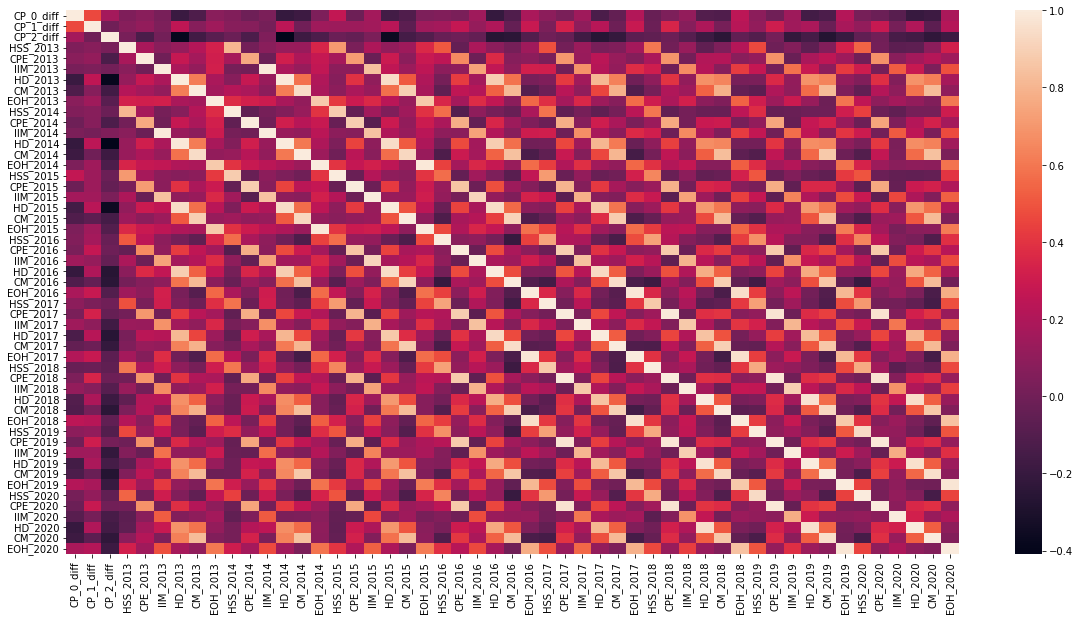

In [39]:

plt.rcParams['figure.figsize'] = [20, 10]

heatmap = sn.heatmap(corrMatrix_two, annot=False)


# Conclusions 

__result 1 .__ 
Find out why the correlation 

__result 2 .__ 
Can I consider case peaks like so as a black box ? 
